# <center>Data Science Salaries Analysis + Prediction ↗️

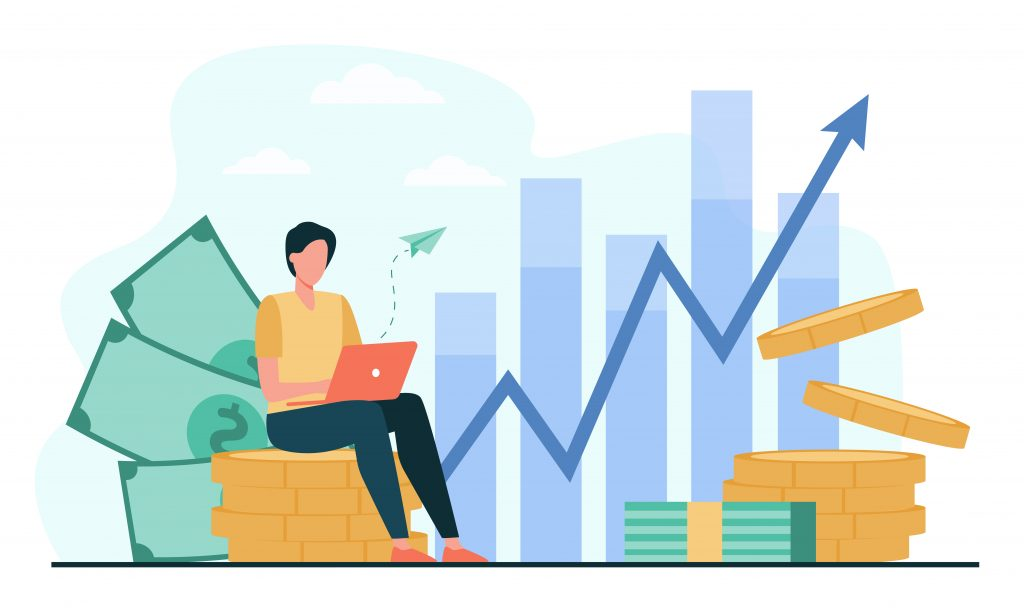

> **About**: salaries of data scientists in the last two years

# Import Packages 

In [1]:
# EDA 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocesing
from sklearn.model_selection import train_test_split

# Modeling 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error


# Plots settings
sns.set(rc={'figure.figsize': [15, 7]}, font_scale=1.2) # Standard figure size for all 
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

# Reading and Exploring 

In [2]:
df = pd.read_csv("../input/data-science-job-salaries/ds_salaries.csv",index_col=[0])
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
201,2021,SE,FT,Machine Learning Infrastructure Engineer,195000,USD,195000,US,100,US,M
511,2022,MI,FT,Business Data Analyst,90000,CAD,70912,CA,50,CA,L
257,2021,SE,FT,Principal Data Scientist,147000,EUR,173762,DE,100,DE,M
195,2021,MI,FT,Data Scientist,147000,USD,147000,US,50,US,L
332,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [5]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Univariate Analsis

In [6]:
df.sample()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
12,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR,M


Text(0.5, 1.0, 'Work year')

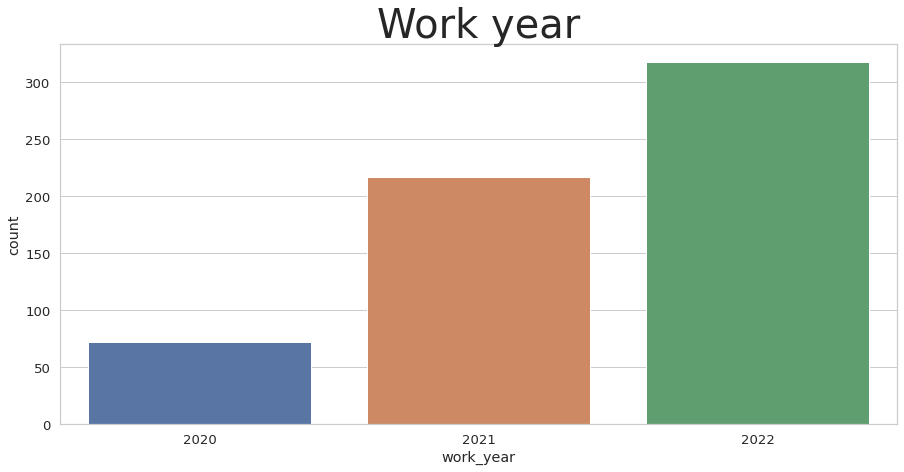

In [7]:
sns.countplot(df['work_year'])
plt.title("Work year",fontsize=40)

Text(0.5, 1.0, 'What is the most frequent Job title ? ')

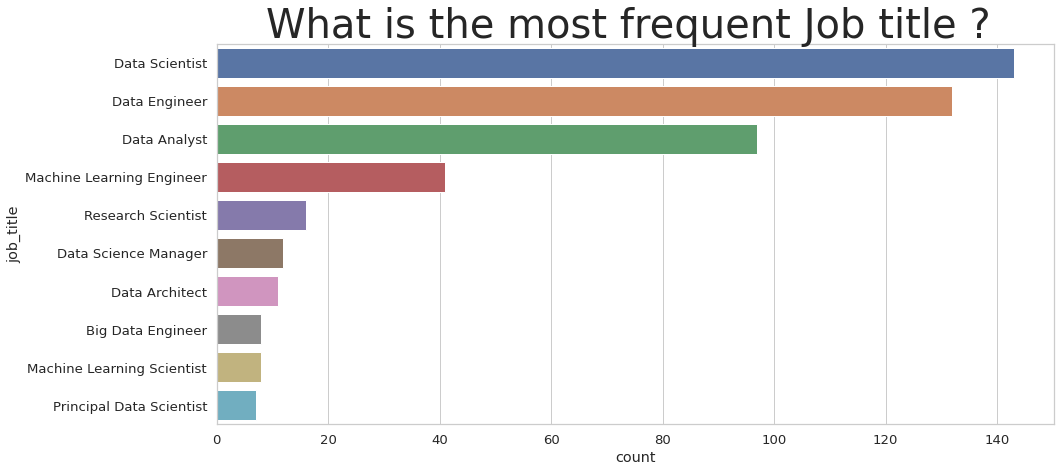

In [8]:
sns.countplot(y=df['job_title'],order=df['job_title'].value_counts().head(10).index)
plt.title("What is the most frequent Job title ? ",fontsize=40)

In [9]:
experience = {
    "EN":"Entry-level / Junior", 
    "MI": "Mid-level / Intermediate",
    "SE": "Senior-level / Expert",
    "EX": "Executive-level / Director"
}

In [10]:
plot = df['experience_level'].map(experience)

Text(0.5, 1.0, 'What is distribution of experience in market ?')

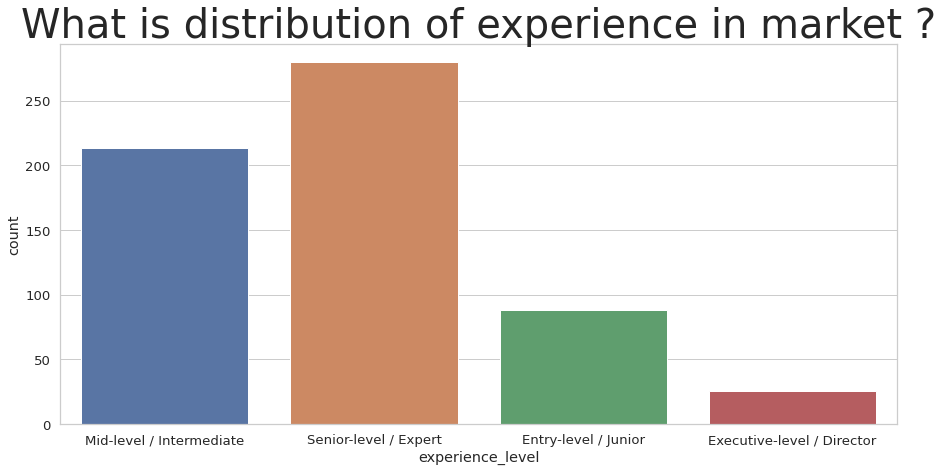

In [11]:
sns.countplot(plot)
plt.title("What is distribution of experience in market ?",fontsize=40,)

Text(0.5, 1.0, 'What is the remote ratio in market ?')

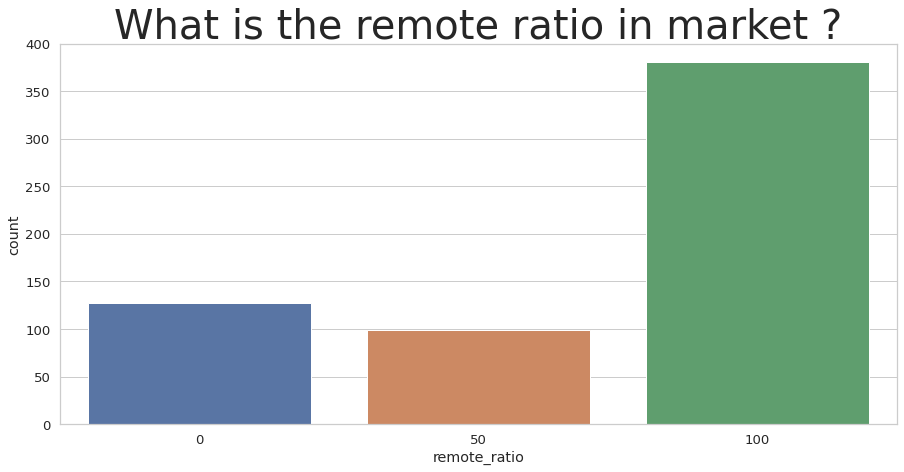

In [12]:
sns.countplot(df['remote_ratio'])
plt.title("What is the remote ratio in market ?",fontsize=40,)

Text(0.5, 1.0, 'How much do Small companies represent in the market? ?')

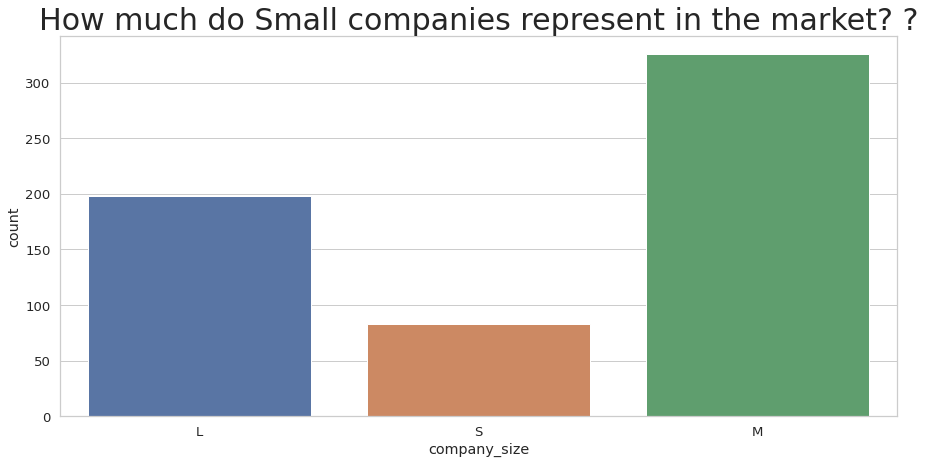

In [13]:
sns.countplot(df['company_size'])
plt.title("How much do Small companies represent in the market? ?",fontsize=30,)

Text(0.5, 1.0, 'What is the most common currency used in market ?')

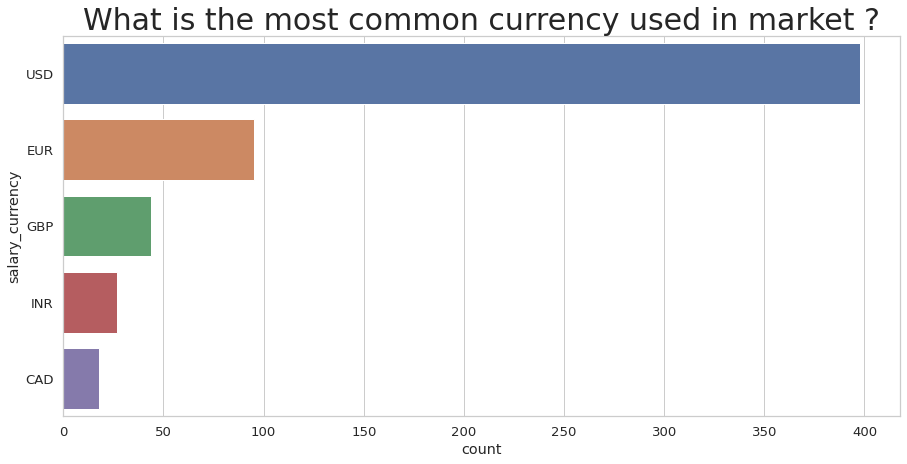

In [14]:
sns.countplot(y=df['salary_currency'],order=df['salary_currency'].value_counts().head().index)
plt.title("What is the most common currency used in market ?",fontsize=30)

Text(0.5, 1.0, 'What is the most common employee residence in market ?')

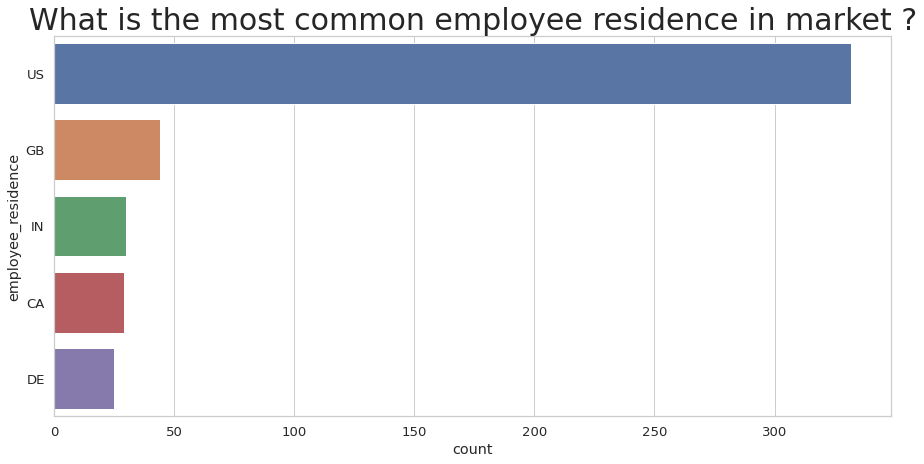

In [15]:
sns.countplot(y=df['employee_residence'],order=df['employee_residence'].value_counts().head().index)
plt.title("What is the most common employee residence in market ?",fontsize=30)

Text(0.5, 1.0, 'Where is the place with the most jobs ?')

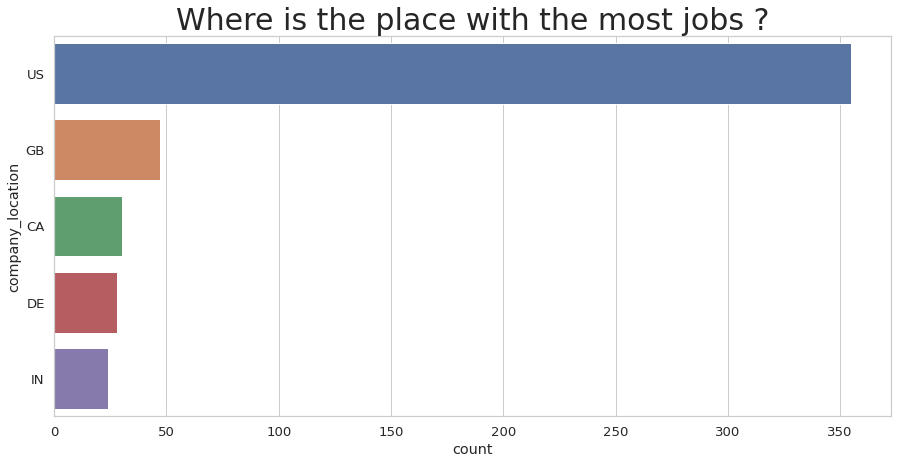

In [16]:
sns.countplot(y=df['company_location'],order=df['company_location'].value_counts().head().index)
plt.title("Where is the place with the most jobs ?",fontsize=30)

Text(0.5, 1.0, 'Salary Distribution')

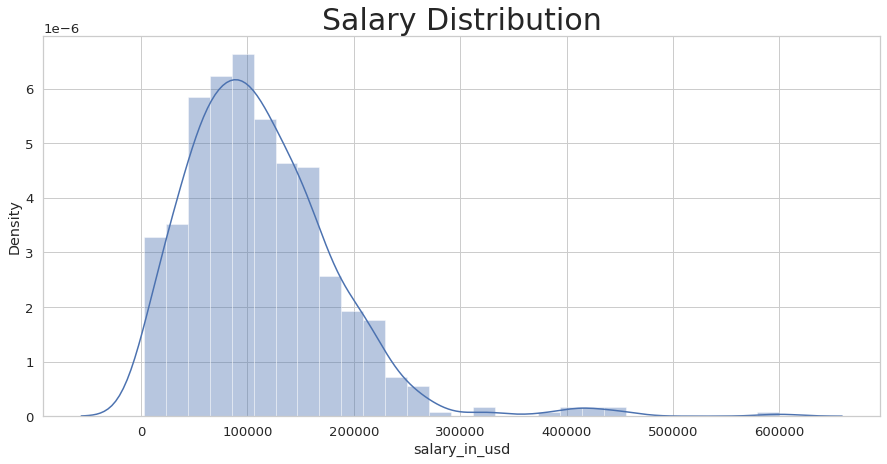

In [17]:
sns.distplot(df['salary_in_usd'])
plt.title("Salary Distribution",fontsize=30)

## Bivariate Analysis

Text(0.5, 1.0, 'Salary changes in the last three years')

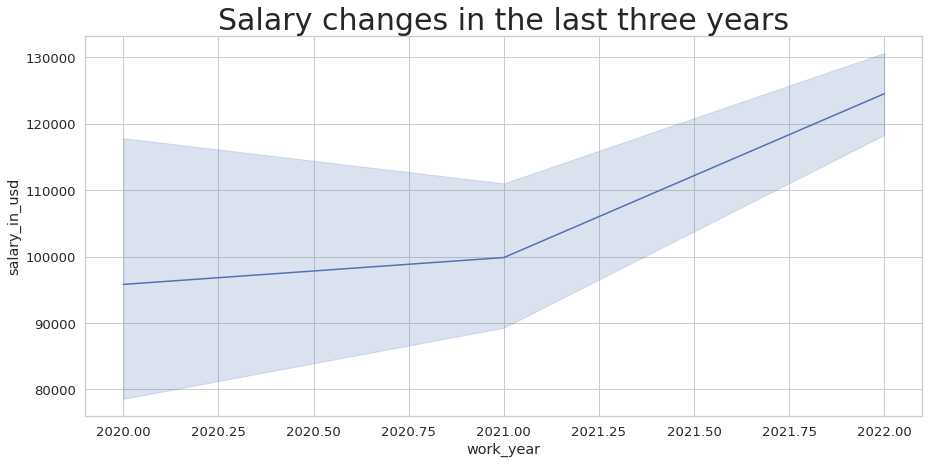

In [18]:
sns.lineplot(df['work_year'],df['salary_in_usd'])
plt.title("Salary changes in the last three years",fontsize=30)

Text(0.5, 1.0, 'Relation between Salary and experience')

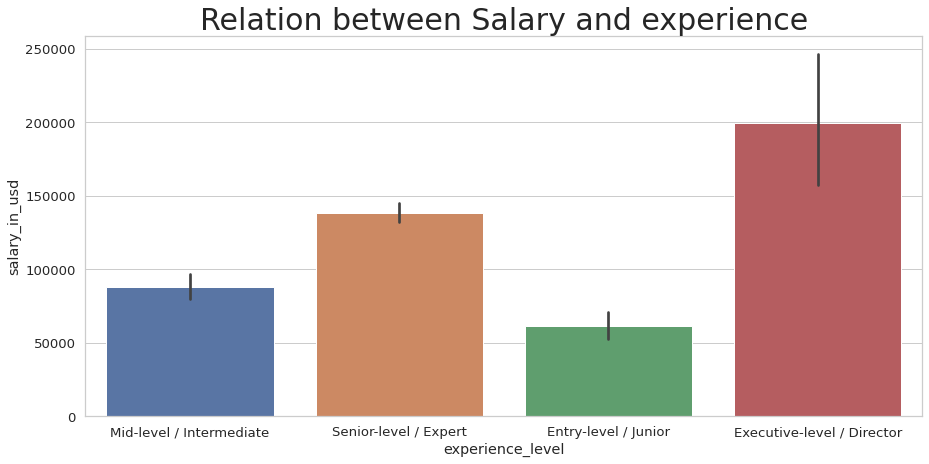

In [19]:
sns.barplot(plot,df['salary_in_usd'])
plt.title("Relation between Salary and experience",fontsize=30)

Text(0.5, 1.0, 'Relation between Salary and company size')

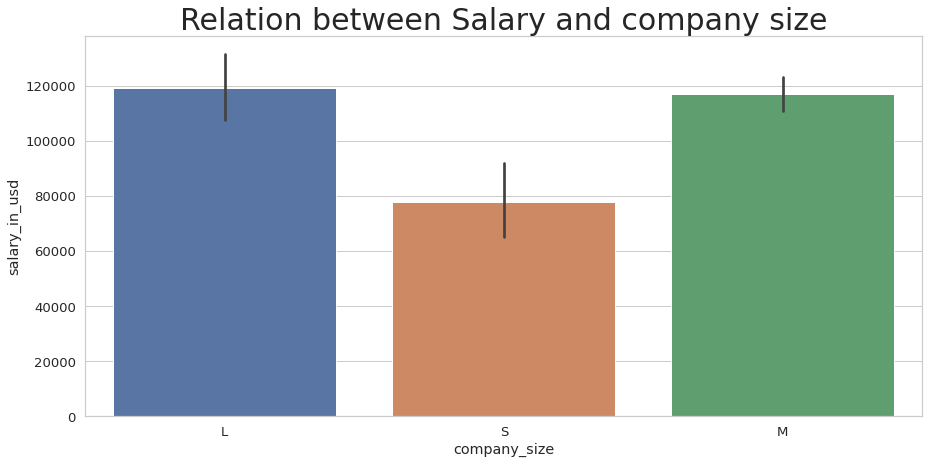

In [20]:
sns.barplot(df['company_size'],df['salary_in_usd'])
plt.title("Relation between Salary and company size",fontsize=30)

Text(0.5, 1.0, 'Relation between Salary and employment type')

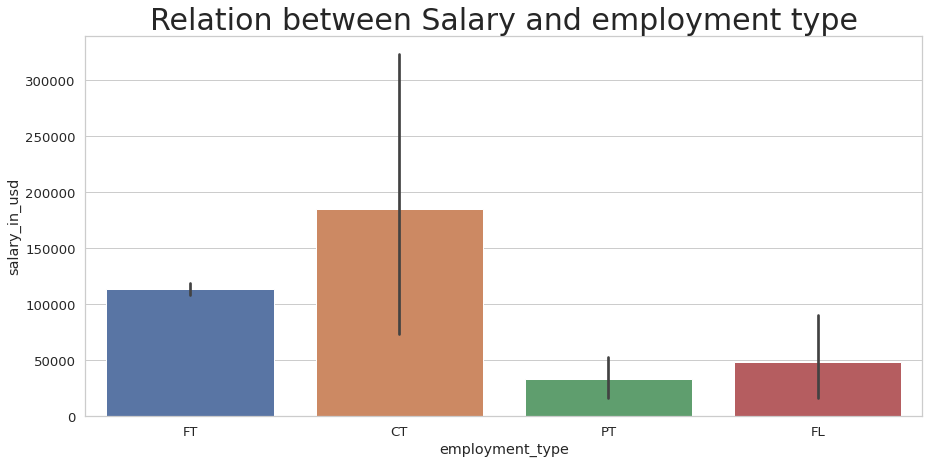

In [21]:
sns.barplot(df['employment_type'],df['salary_in_usd'])
plt.title("Relation between Salary and employment type",fontsize=30)

# Feature Engineering

In [22]:
df.sample()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
299,2022,SE,FT,Data Scientist,99360,USD,99360,US,100,US,M


### Experience level

In [23]:
experience = {
    "EN":0,
    "MI":1,
    "SE":2,
    "EX":3
}
# We need to try start with 1 NOT zero 

In [24]:
df['experience_level'] = df['experience_level'].map(experience)

### Job title

> There are a lot of unique and duplicated title, Need to reduce it 

In [25]:
def Titles_reduction(x):
    if ( x.find("Data Science")>=0  or  x.find("Data Scientist")>=0   ):
        df['job_title'].replace(x,'Data Scientist',inplace = True)
    elif ( x.find("Analyst")>=0  or  x.find("Analytics")>=0 ): 
        df['job_title'].replace(x,'Data Analyst',inplace = True)
    elif ( x.find("ML")>=0  or  x.find("Machine Learning")>=0 ) :
        df['job_title'].replace(x,'Machine Learning Engineer',inplace = True) 
    elif ( x.find("Data Engineer")>=0  or  x.find("Data Engineering")>=0 ):
        df['job_title'].replace(x,'Data Engineer',inplace = True)
    else : 
        df['job_title'].replace(x,'AI related',inplace = True)

In [26]:
for i in df['job_title']:
    Titles_reduction(i)

In [27]:
df['job_title'].value_counts()

Data Scientist               192
Data Engineer                158
Data Analyst                 135
Machine Learning Engineer     68
AI related                    54
Name: job_title, dtype: int64

### Size

In [28]:
size = {
    "S":0,
    "M":1,
    "L":2
}

In [29]:
df['company_size'] = df['company_size'].map(size)

### Employee residence & Company_location

In [30]:
def res(x):
    if (x == "US"):
        return "US" 
    else :
        return "Other"

In [31]:
df['employee_residence'] = df['employee_residence'].apply(res)

In [32]:
df['company_location'] = df['company_location'].apply(res)

### salary in usd

In [33]:
# df.drop(["salary_in_usd"],axis=1,inplace=True)
df['salary_in_usd'] = np.log(df['salary_in_usd']) 
df['salary_in_usd']

0      11.287692
1      12.468437
2      11.599323
3       9.903488
4      11.918391
         ...    
602    11.944708
603    11.744037
604    11.767568
605    11.918391
606    12.206073
Name: salary_in_usd, Length: 607, dtype: float64

# Data Preprocesing

### Classifiy data 

In [34]:
nums = df.select_dtypes(exclude="object").columns
nums

Index(['work_year', 'experience_level', 'salary', 'salary_in_usd',
       'remote_ratio', 'company_size'],
      dtype='object')

In [35]:
cats = df.select_dtypes(include="object").columns
cats

Index(['employment_type', 'job_title', 'salary_currency', 'employee_residence',
       'company_location'],
      dtype='object')

### Handling Nominal Data

In [36]:
df = pd.get_dummies(df,columns=cats,drop_first=True)

### Splitting Data

In [37]:
# define dataset
X, y = df.drop("salary",axis=1) , df["salary"] 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
X_train

,work_year,experience_level,salary_in_usd,remote_ratio,company_size,employment_type_FL,employment_type_FT,employment_type_PT,job_title_Data Analyst,job_title_Data Engineer,...,salary_currency_HUF,salary_currency_INR,salary_currency_JPY,salary_currency_MXN,salary_currency_PLN,salary_currency_SGD,salary_currency_TRY,salary_currency_USD,employee_residence_US,company_location_US
134,2021,0,11.512925,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
391,2022,1,11.695247,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
587,2022,2,11.849398,100,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
283,2021,2,11.561716,100,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
186,2021,2,10.819778,100,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2021,2,10.915088,100,2,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,2020,2,11.736069,50,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
359,2022,2,11.415313,100,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
192,2021,1,9.798127,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# Handling Numerical 

In [39]:
nums= nums.drop("salary")

In [40]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
scalar.fit(X_train[nums])

StandardScaler()

In [41]:
X_train[nums] = scalar.transform(X_train[nums])
X_test[nums] = scalar.transform(X_test[nums])

# Modeling 

In [42]:
models = {
    "Linear regression":LinearRegression(),
    "Lasso ":LassoCV(),
    "Ridge":RidgeCV(),
    "ElasticNet":ElasticNetCV()
}

In [43]:
Results = {
    "Model":[],
    "Train Score":[],
    "Test Score":[],
    "RMSE":[]
}

In [44]:
for name, model in models.items():
    model.fit(X_train,np.log(y_train))
    train_s = model.score(X_train,np.log(y_train))
    test_s = model.score(X_test,np.log(y_test))
    y_pred = model.predict(X_test)
    RMSE = mean_squared_error((y_pred),np.log(y_test))
    Results["Model"].append(name)
    Results["Train Score"].append(train_s)
    Results["Test Score"].append(test_s)
    Results["RMSE"].append(RMSE)
    print("Model: " , name)
    print("Train Score: " , train_s)
    print("Test Score : " , test_s)
    print("RMSE : " , round(RMSE,2))
    print("===========================")

Model:  Linear regression
Train Score:  0.9997915091505286
Test Score :  0.9388969307248627
RMSE :  0.06
Model:  Lasso 
Train Score:  0.9734770756550906
Test Score :  0.9661601168574242
RMSE :  0.03
Model:  Ridge
Train Score:  0.9624471459422653
Test Score :  0.9577768127486119
RMSE :  0.04
Model:  ElasticNet
Train Score:  0.9828918137840142
Test Score :  0.9745802505680587
RMSE :  0.02


In [45]:
scores = pd.DataFrame(Results)

In [46]:
scores

,Model,Train Score,Test Score,RMSE
0,Linear regression,0.999792,0.938897,0.057551
1,Lasso,0.973477,0.966160,0.031872
2,Ridge,0.962447,0.957777,0.039768
3,ElasticNet,0.982892,0.974580,0.023942


Text(0.5, 1.0, 'Train Score')

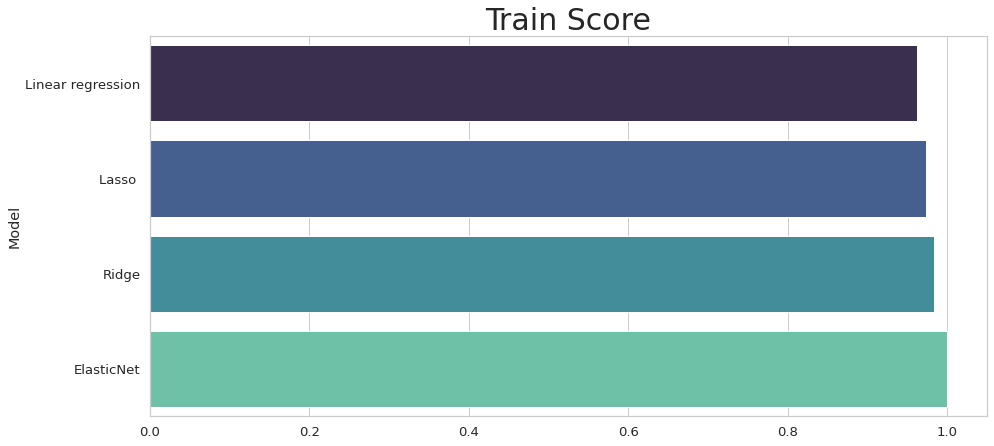

In [47]:
sns.barplot(y=scores['Model'], x=sorted(scores['Train Score']),palette="mako")
plt.title("Train Score",fontsize=30)

Text(0.5, 1.0, 'Test Score')

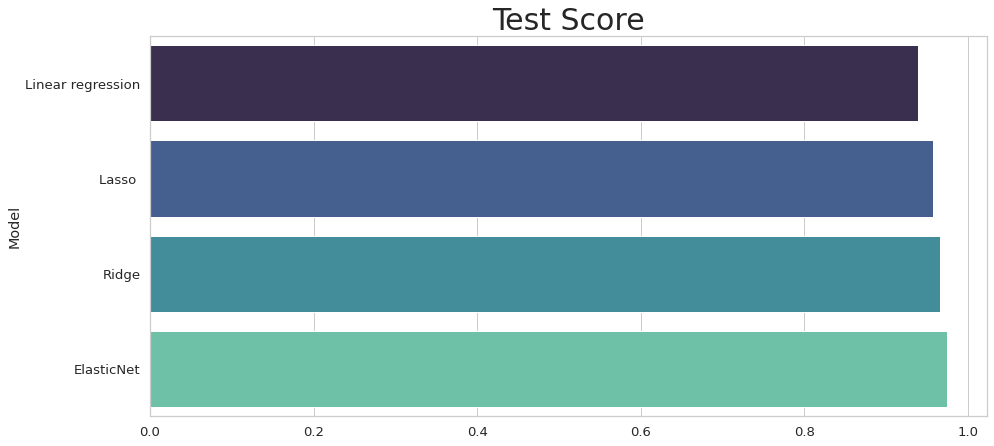

In [48]:
sns.barplot(y=scores['Model'], x=sorted(scores['Test Score']),palette="mako")
plt.title("Test Score",fontsize=30)

Text(0.5, 1.0, 'RMSE')

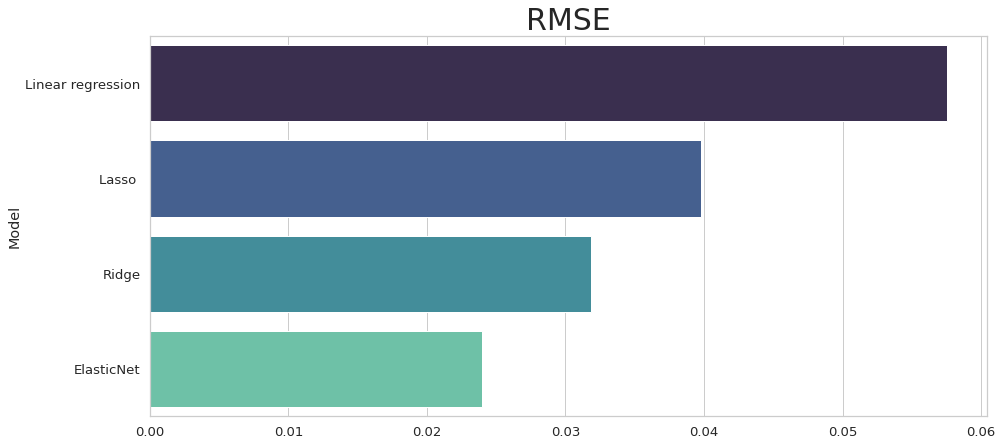

In [49]:
sns.barplot(y=scores['Model'], x=sorted(scores['RMSE'],reverse=True),palette="mako")
plt.title("RMSE",fontsize=30)

> Model Chosen **ElasticNetCV**